### Week 4: Numbers to Audio

In [50]:
speakers = {'1': 's01', '2': 's02', '3': 's03', '4': 's04', '5': 's05', '6': 's06', '7': 's07', '8': 's08', 
            '9': 's09', '10': 's10', '11': 's11', '12': 's12', '13': 's13', '14': 's14', '15': 's15', '16': 's16'}

numbers_dict = {'0': 'zero', '1': 'one', '2': 'two', '3': 'three', 
                '4': 'four', '5': 'five', '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine'}

In [51]:
# Input are strings 
converted = None 
number_input = list(input("Enter number: "))

if any([i not in numbers_dict.keys() for i in number_input]):
    print("Invalid Input")
else:
    # Convert the input to number
    converted = [numbers_dict[i] for i in number_input]
    print("Convered to:", converted)

Convered to: ['zero', 'one', 'two', 'three', 'four', 'zero', 'one', 'three', 'five', 'seven', 'nine', 'zero', 'two', 'four', 'six', 'eight', 'zero', 'five', 'six', 'seven', 'eight', 'nine']


In [52]:
from pydub import AudioSegment
from pydub.playback import play

if converted is None:
    print("No valid number input from previous cell.")
else:
    audio_number = []
    # We will allow the user to select which speaker they want to hear
    s = input("Select Speaker (1 to 16): ")
    if s not in speakers.keys():
        print("Invalid Input")
    else:
        print("Speaker:", speakers[s])
        for k in converted:
            sound = AudioSegment.from_file(f"digits/{speakers[s]}/{k}.wav", 
                                           format="wav")
            audio_number.append(sound) # Append to list
	# The sum() function will concatenate the sound files
	# to create a full audio
    audio = sum(audio_number)

Speaker: s16


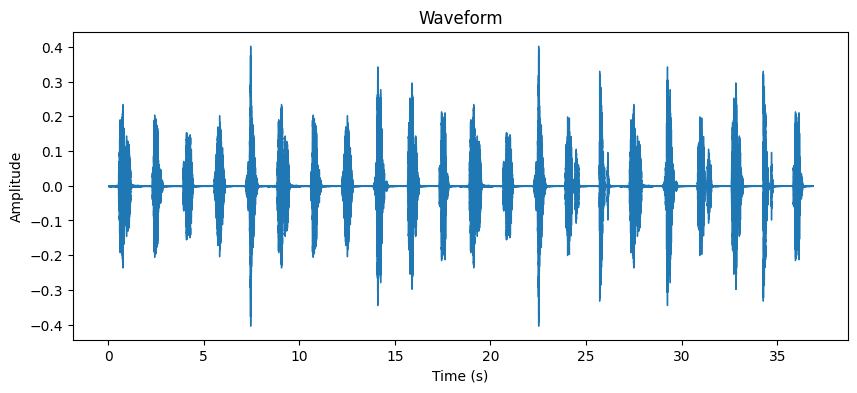

In [53]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Export the audio file
export_path = "audio.wav"
audio.export("audio.wav", format="wav")

# Draw waveform
y, sr = librosa.load(export_path, sr=None)

plt.figure(figsize=(10,4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

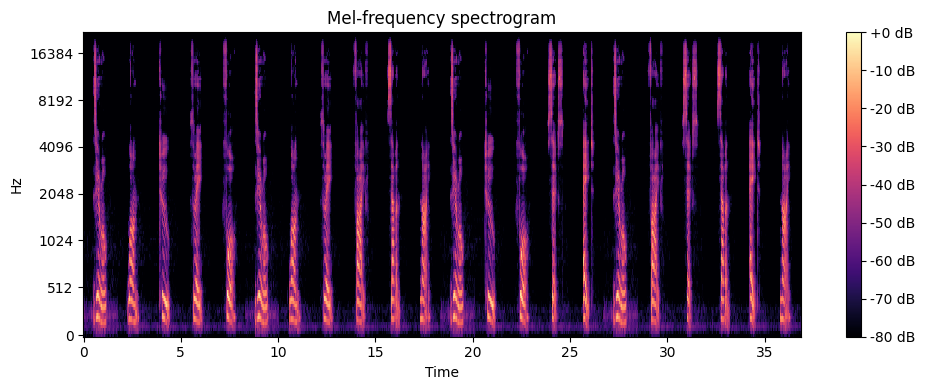

In [54]:
import numpy as np

mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()